# Detecção do Câncer de Mama Utilizando Algoritmos de Aprendizado de Máquina

## O que é Bioinformática?

+ Integra biologia, ciência da computação e estatística para analisar grandes volumes de dados biológicos.
+ Com essa integração, conseguimos uma junção dos mundos de tecnologia e medicina fazendo cada vez mais descobertas e avanços.
+ Aplicações incluem descoberta de medicamentos, diagnóstico de doenças e medicina personalizada.
+ Com o avanço da IA cada vez mais conseguimos um avanço mais rápido e acertivo na bioinformatica.

## Por que a Bioinformática é Importante?

+ Aumenta a precisão diagnóstica ao identificar padrões complexos em dados de saúde.
+ Permite análises rápidas e confiáveis em problemas de saúde pública, como o câncer de mama.
+ Com a medicina personalizada ainda conseguimos um diagnostico mais acertivo para cada paciente.
+ Contribui para o desenvolvimento de novos medicamentos.
+ Contribui também para acompanhar evolução na parte de biomedicina.

## Tema escolhido: Câncer de Mama

+ É o tipo de câncer mais comum entre mulheres e a principal causa de mortalidade feminina relacionada ao câncer.
+ Diagnósticos precoces aumentam significativamente as chances de sobrevivência e reduzem tratamentos desnecessários.

## Objetivo do Trabalho

+ Comparar a eficiência de algoritmos de aprendizado de máquina para classificar tumores em benignos ou malignos.

## Artigos utilizados como base

+ Artigo 1: Prediction of Breast Cancer​ / Publicado em 2018
    - Comparou múltiplos algoritmos (Regressão Logística, KNN, Árvore de Decisão, SVM...) para diagnóstico e prognóstico de câncer de mama.
    - Destaque: SVM apresentou maior precisão (99% em kernel linear).

+ Artigo 2: Machine Learning in Breast Cancer Diagnosis and Prognosis​ / Publicado em 2020
    - Revisou algoritmos como ANN, SVM e KNN aplicados ao WBCD.
    - Resultados destacaram o potencial de modelos híbridos e técnicas de otimização. Prevenção de overfitting, viés, melhoria de precisão.
    - SVM mostrou alta precisão em várias análises, alcançando até 99,68% em algumas comparações com outras técnicas.

## Algoritmos Escolhidos

1. Regressão Logística
2. K-Nearest Neighbors (KNN)
3. Support Vector Classifier (SVC)
    - O SVC é uma implementação específica de SVM que se concentra na tarefa de classificação. Permite ajustar o modelo para dados de classificação, incluindo a escolha do kernel (linear, polinomial, RBF, etc.), a regularização e outros parâmetros. No nosso caso, optamos por utilizar o Kernel RBF (Radial Basis Function).

# Dataset

+ Breast Cancer Wisconsin (Diagnostic) Dataset
    Criado pelo Dr. William H. Wolberg na Universidade de Wisconsin.
    
    - Dataset padrão para pesquisas em aprendizado de máquina no diagnóstico de câncer de mama
    - Contém 569 registros e 30 características
        - Maligno: 212 amostras
        - Benigno: 357 amostras

    ------------------
    - Raio (radius): Média da distância do centro para o perímetro.
    - Textura (texture): Desvio padrão dos valores de escala de cinza.
    - Perímetro (perimeter).
    - Área (area).
    - Suavidade (smoothness): Variação local nos comprimentos dos raios.
    - Compactação (compactness): (perímetro² / área) - 1.0.
    - Concavidade (concavity): Severidade das porções côncavas do contorno.
    - Pontos côncavos (concave points): Número de porções côncavas do contorno.
    - Simetria (symmetry).
    - Dimensão fractal (fractal dimension): "Rugosidade" da linha do contorno.

    Para cada uma dessas características, são fornecidos:

    - Média.
    - Erro padrão.
    - Valor máximo.

-------------------
+ Obtenção:
  As imagens citológicas são obtidas por aspiração por agulha fina (Fine Needle Aspiration, FNA)

# Implementação

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Análise do Dataset

In [19]:
df = pd.read_csv("./data/data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

O dataset contém 569 ocorrências e 32 colunas.

- Diagnosis:
    * M = Maligno
    * B = Benigno

_se = standard error

In [21]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Verificando se o dataset possui alguma ocorrência sem informação em alguma coluna

In [22]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

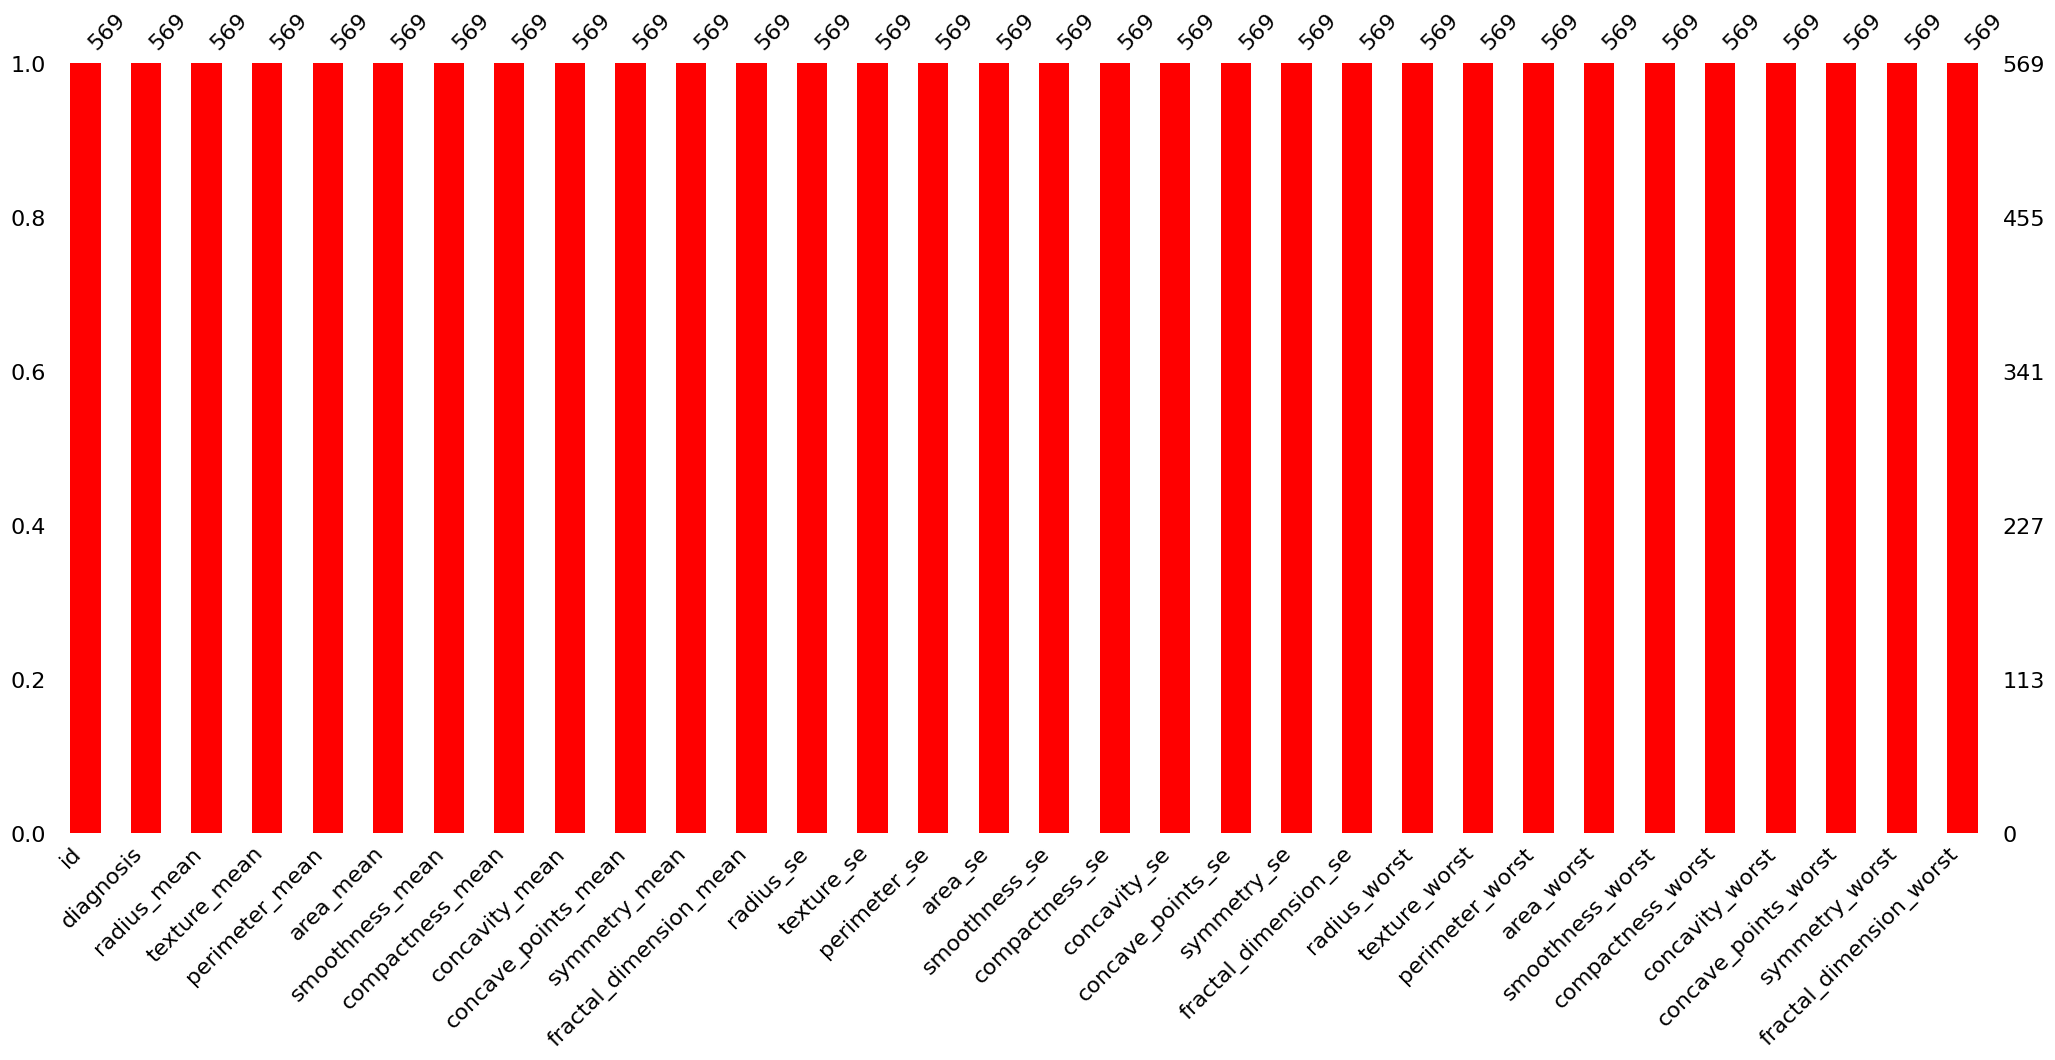

In [23]:
msno.bar(df, color="red")

## Transformando e representando visualmente as categorias de diagnóstico em dados numéricos, para utilizar na construção do modelo

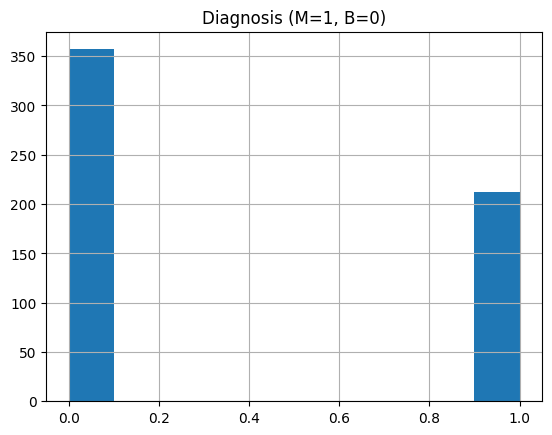

In [24]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].hist()
plt.title('Diagnosis (M=1, B=0)')
plt.show()

## Análise exploratória dos dados

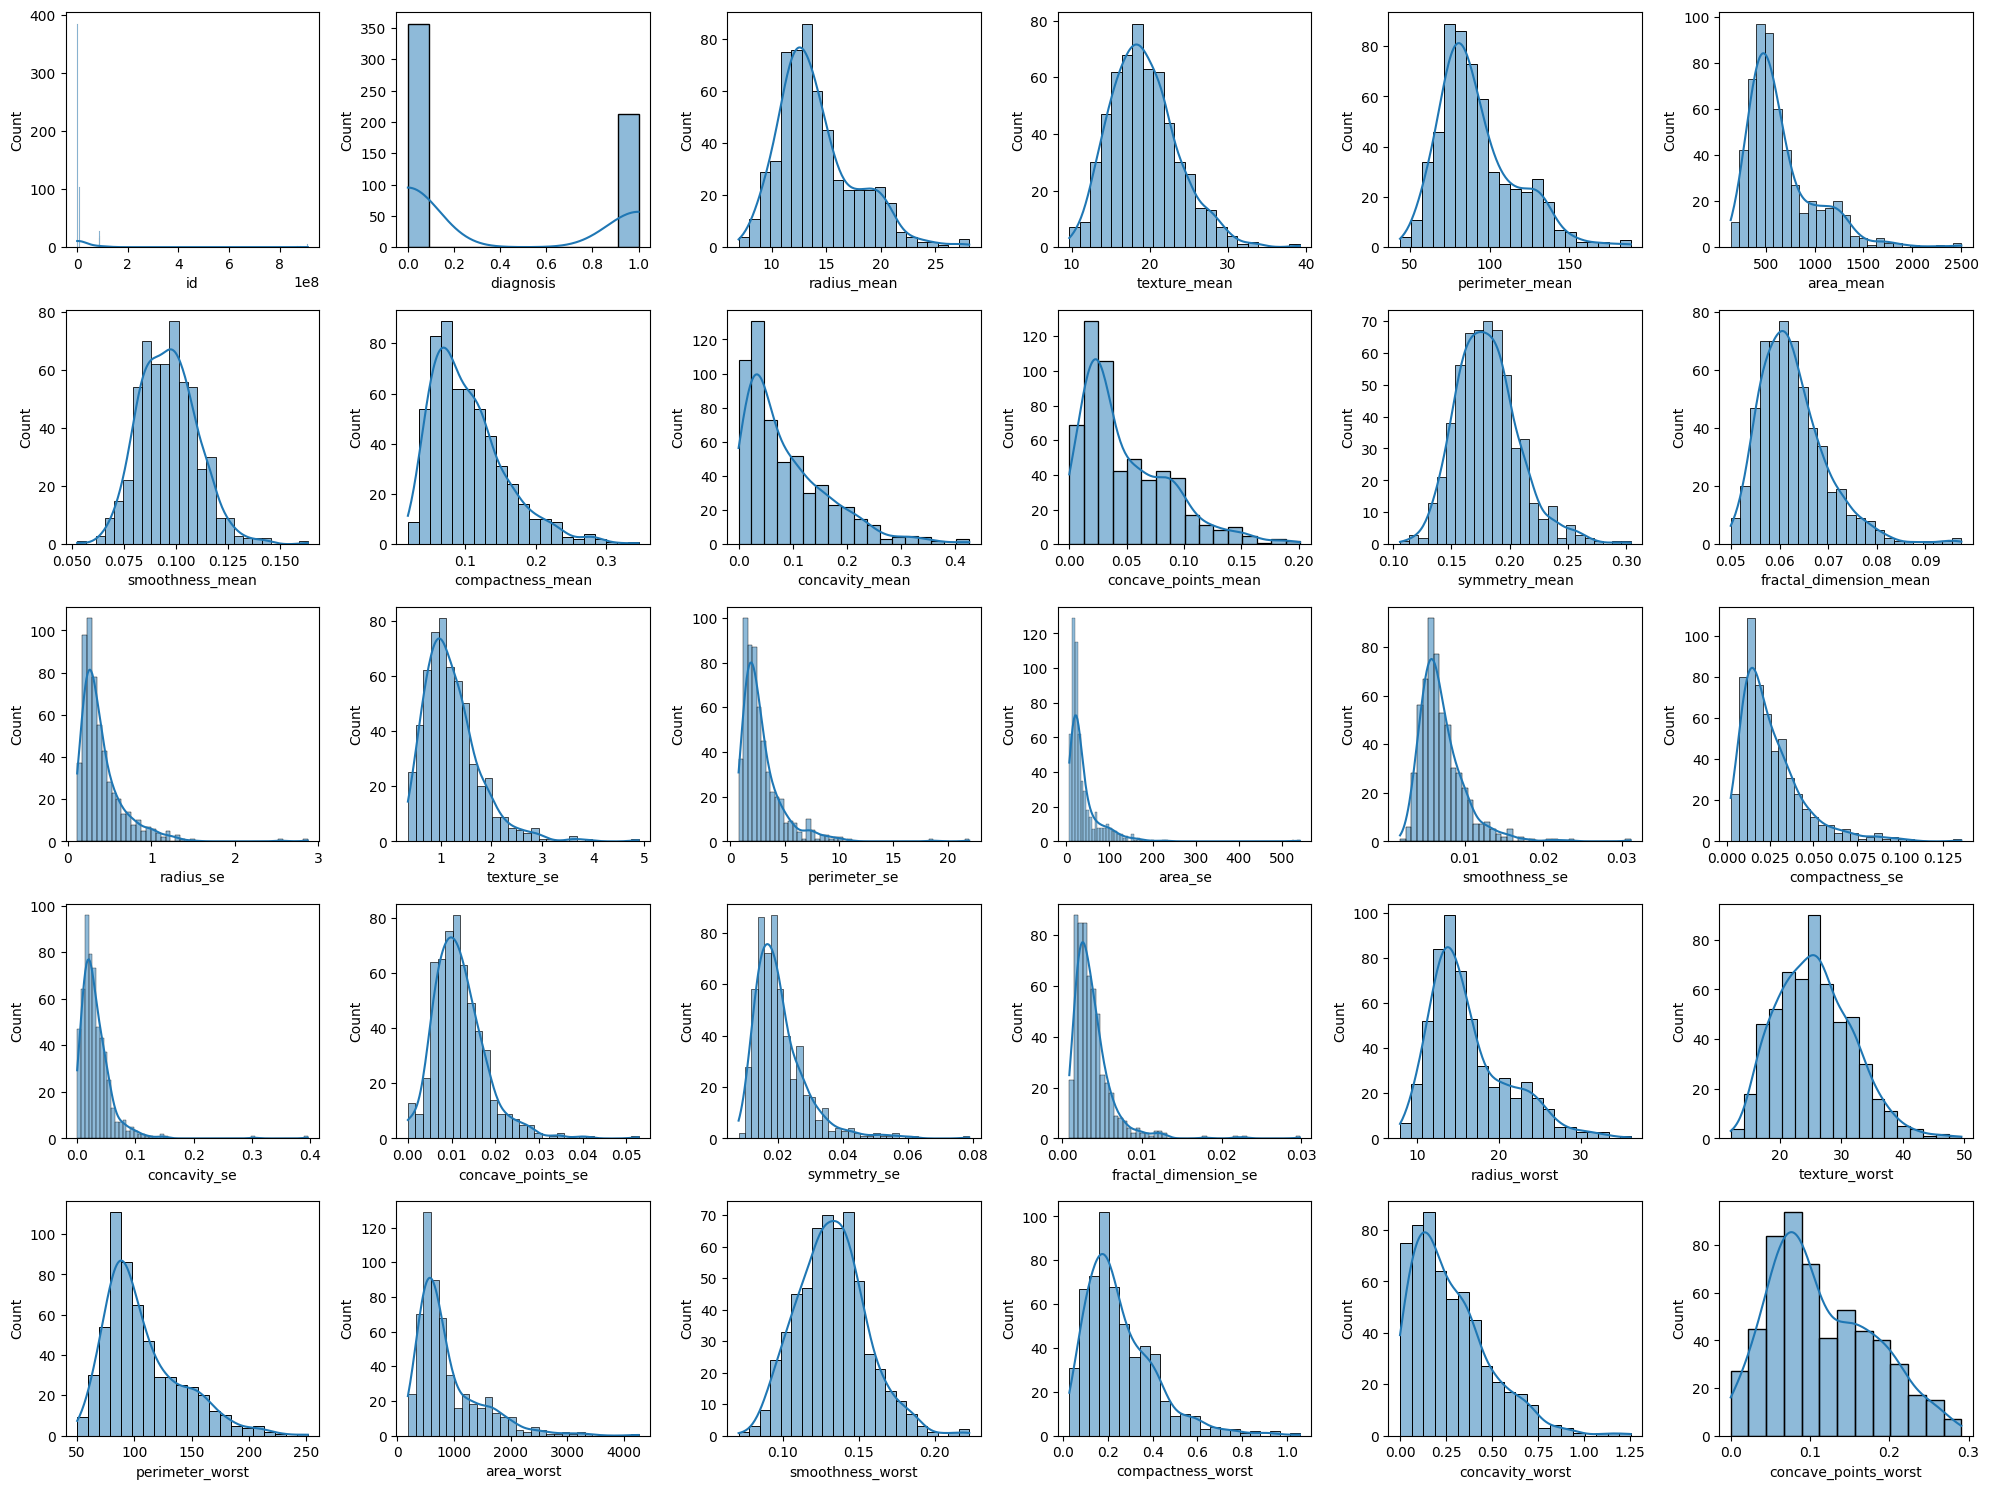

In [25]:

columns_to_plot = df.columns[:30] 
rows = math.ceil(len(columns_to_plot) / 6)

plt.figure(figsize=(20, rows * 3))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(rows, 6, i)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)

plt.tight_layout()
plt.show()


Conclusão da análise exploratória:
1. As variáveis variam muito em suas escalas. Por exemplo:
 - radius_mean e area_mean têm valores na casa das dezenas e milhares
 - smoothness_mean, fractal_dimension_mean, e outras têm valores muito pequenos (< 1).
 - Isso indica a necessidade de normalização ou padronização dos dados antes de aplicar algoritmos de machine learning.

2. Há indícios de outliers em variáveis como area_mean e radius_mean (caudas longas e desvios grandes dos valores médios).

## Matriz de correlação

A correlação mede a força e a direção do relacionamento linear entre duas variáveis.

Para que serve?
1. Análise de Relação Linear: Identificar quais variáveis têm relações fortes (positivas ou negativas) para entender melhor o comportamento dos dados.
2. Seleção de Variáveis: Identificar colunas altamente correlacionadas para remover redundâncias no modelo (quando duas variáveis fornecem a mesma informação).
3. Interpretação Estatística: Ajuda a identificar padrões úteis ou inconsistências nos dados.

In [26]:
correlation_matrix = df.corr()
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


### Gerando o HeatMap das correlações, para facilitar a visualização da Matriz de Correlação

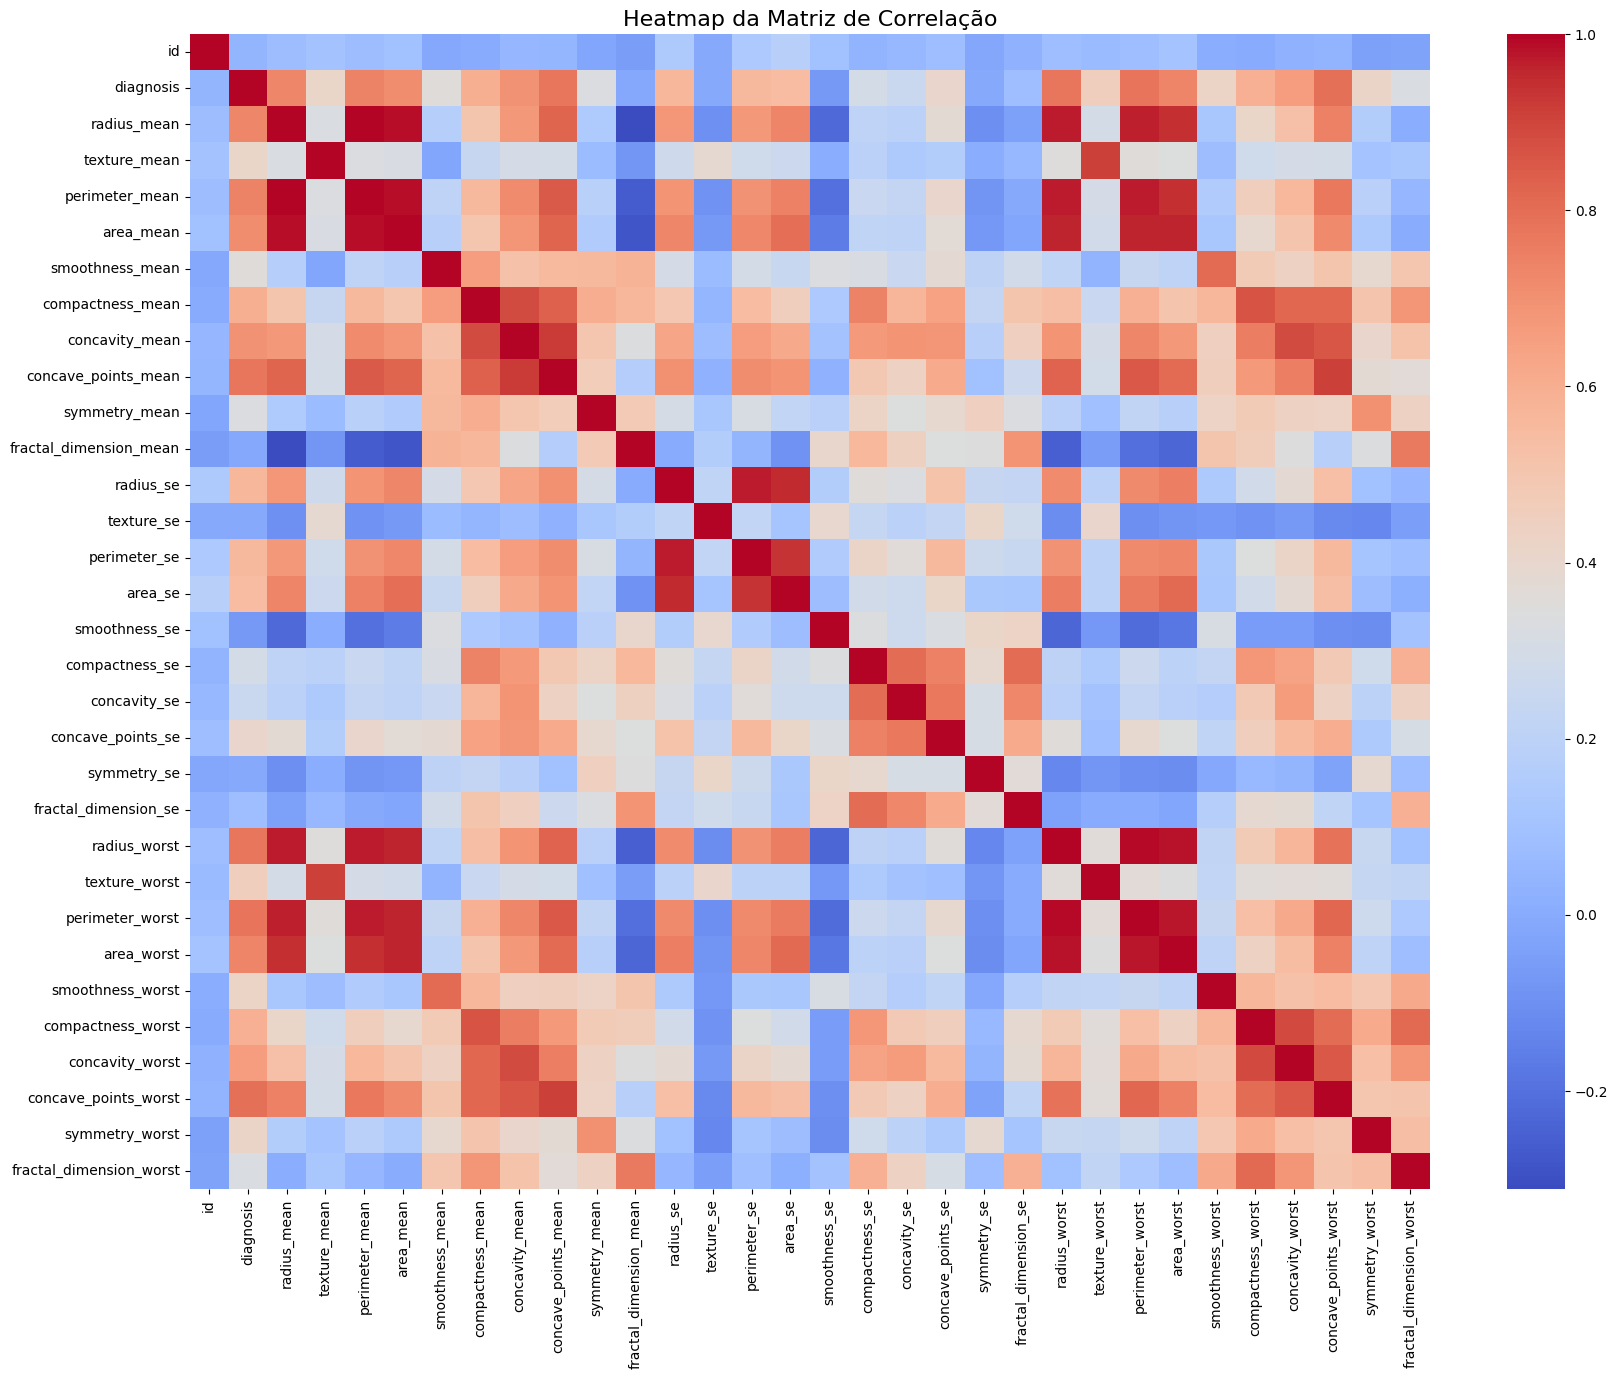

In [27]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap da Matriz de Correlação", fontsize=16)

plt.show()

Como podemos observar no Heatmap, algumas variáveis como radius_mean, perimeter_mean, e area_mean têm correlações muito fortes, indicando uma redundância entre elas. Com base nisso, podemos remover algumas das variáveis para reduzir a dimensionalidade.

### Removendo as variáveis altamente correlacionadas

Qual o benefício dessa remoção?
1. Remove colunas que carregam informações duplicadas, tornando o modelo mais eficiente e reduzindo o risco de overfitting.
2. Menos variáveis ajudam a simplificar o modelo e acelerar os cálculos.
3. Ao eliminar redundâncias, mantemos variáveis que são mais informativas e essenciais.

Para esse caso, escolhemos remover as variáveis que possuem a limiar de correlação maior que 0.92

In [28]:
# Removendo a coluna ID, pois é irrelevante para o algoritmo
df.drop('id', axis=1, inplace=True)

corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]
print("Colunas removidas:", to_drop)

df = df.drop(to_drop, axis=1)

df.head()

Colunas removidas: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst']


,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Construindo o modelo

In [29]:
X=df.drop('diagnosis', axis=1)#Variáveis
y=df['diagnosis']#O que queremos prever

# Deixar o random_state=0 só para que divida os dados de treino e teste da mesma forma
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=0)

# Escalamento (normalização) dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train.shape

(455, 22)

Foram utilizadas 455 amostras para o treinamento (80% do Dataset) e um total de 22 variáveis

# Aplicando alguns algoritmos de ML

## Regressão Logística

Enquanto a regressão lienar foca em prever um valor contínuo (como prever a altura de uma pessoa com base na idade), a regressão linear foca em prever uma probabilidade (0 ou 1/Sim ou não).

Train Accuracy: 0.9846153846153847
Test Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



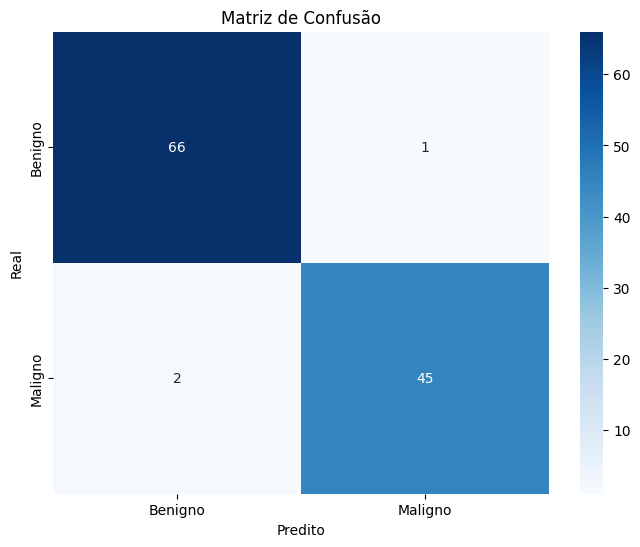

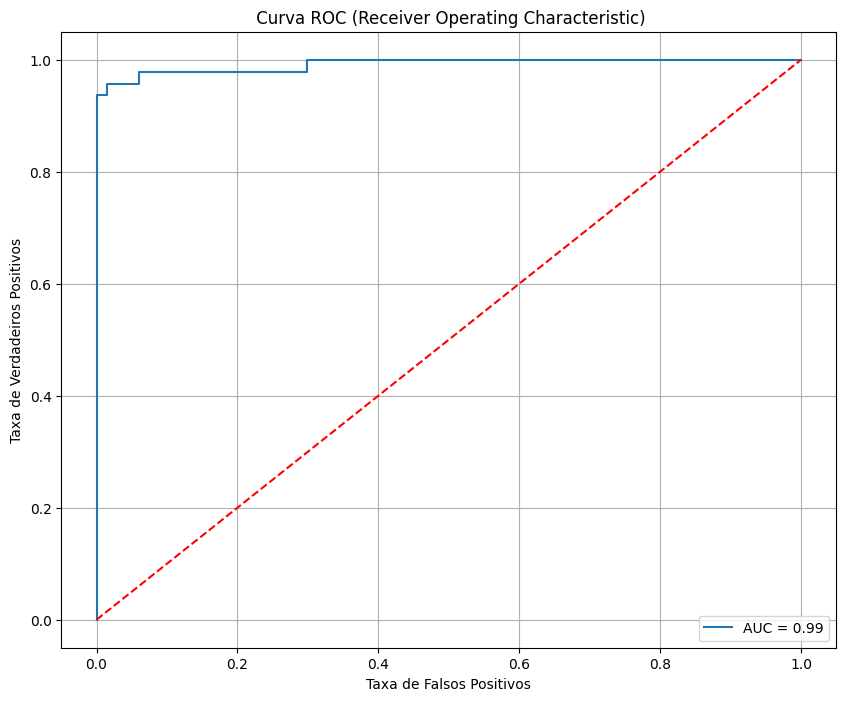

In [31]:
"""
 class_weight='balanced'
 O dataset possui mais amostras de "benigno" do que "maligno", 
 portanto deixamos o class_weight='balanced', assim o algoritmo ajusta os pesos para dar mais atenção as amostras "maligno"
""" 
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
y_test_proba = log_reg.predict_proba(X_test)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Linha de referência (aleatório)
plt.title(" Curva ROC (Receiver Operating Characteristic)")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.grid()
plt.show()


A Curva ROC mede o desempenho do modelo para diferentes limiares de decisão. Quanto mais próxima a curva está do canto superior esquerdo, melhor o modelo.

Linha Azul => Curva ROC
Linha Vermelha => Um modelo aleatório, sem capacidade preditiva
AUC (Área Sob a Curva) => Um AUC próxima de 1 indica um modelo excelente, já um AUC próxima de 0.5 indica um modelo aleatório.

## kNN

Train Accuracy: 0.967032967032967
Test Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



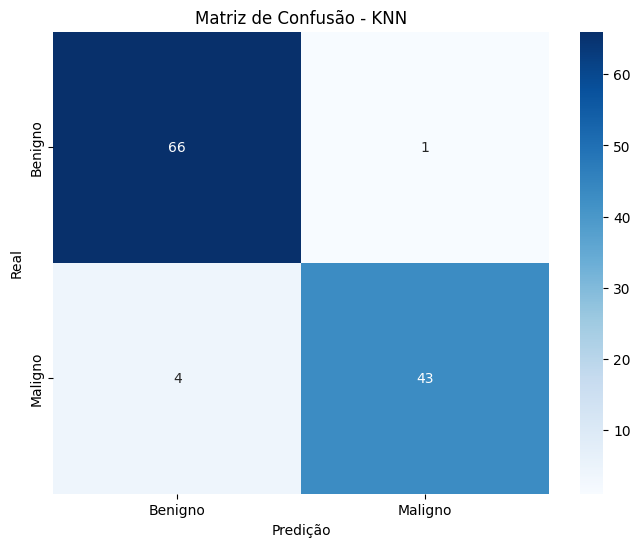

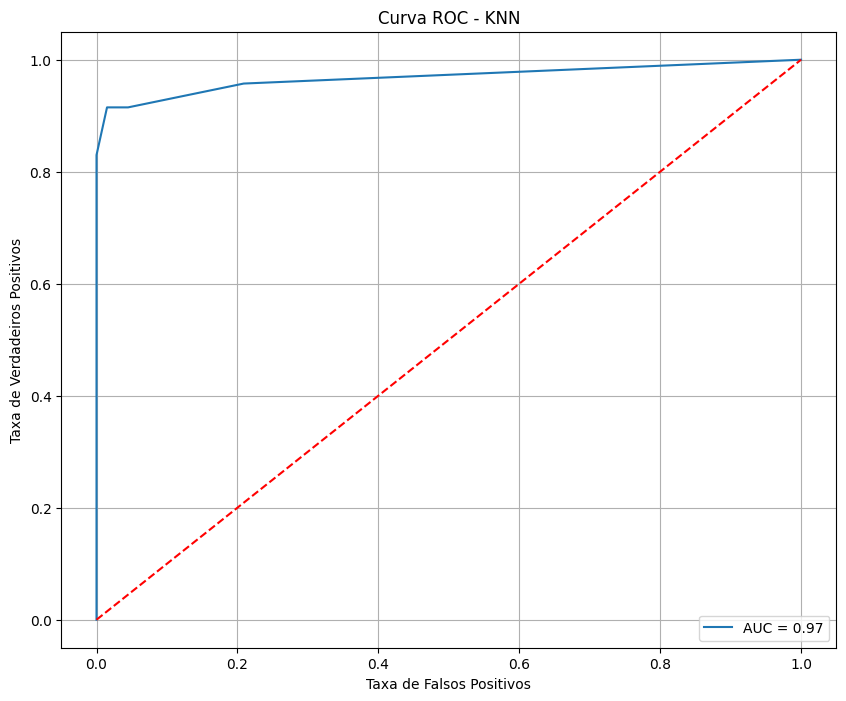

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
y_test_proba = knn.predict_proba(X_test)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Linha de referência (aleatório)
plt.title("Curva ROC - KNN")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## SVC

SVC é uma implementação específica de SVM que se concentra na tarefa de classificação. Permite ajustar o modelo para dados de classificação, incluindo a escolha do kernel (linear, polinomial, RBF, etc.), a regularização e outros parâmetros.

Melhores Parâmetros: {'C': 15, 'gamma': 0.01}
Melhor Acurácia durante a busca: 0.9802197802197803
Train Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



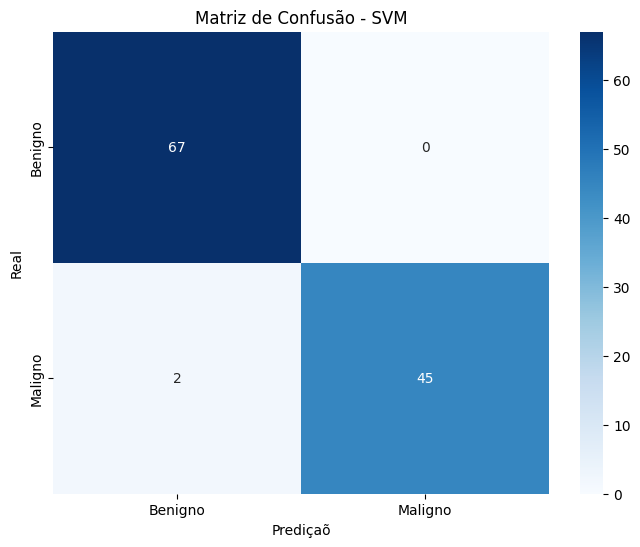

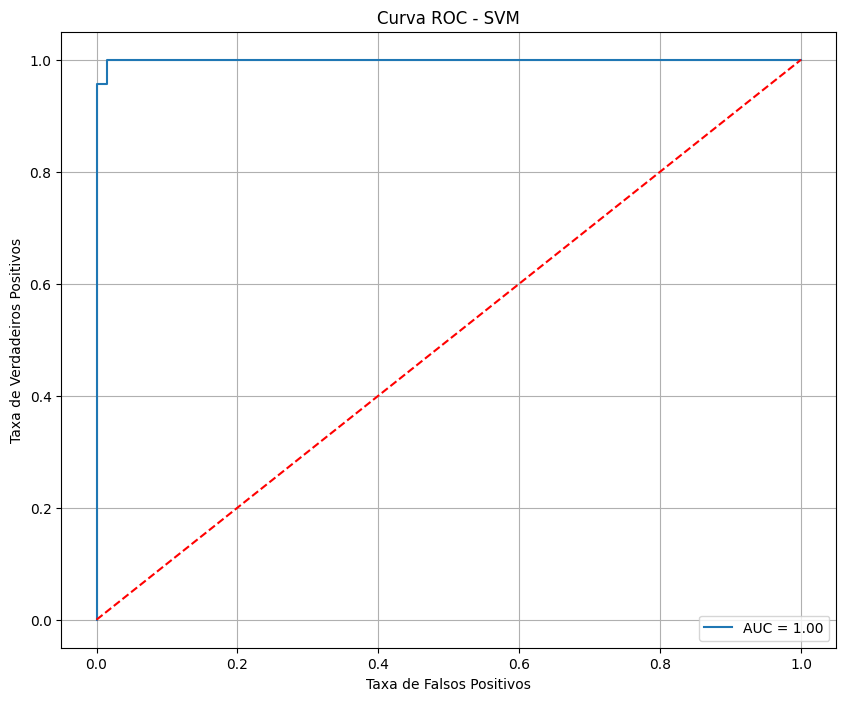

In [33]:
svc = SVC(probability=True)
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Acurácia durante a busca:", grid_search.best_score_)

svc = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], probability=True)
svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
y_test_proba = svc.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Prediçaõ")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Linha de referência (aleatório)
plt.title("Curva ROC - SVM")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Comparação entre os algoritmos

                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Regressão Logística        0.984615       0.973684   0.978261  0.957447   
1                  KNN        0.967033       0.956140   0.977273  0.914894   
2                  SVC        0.989011       0.982456   1.000000  0.957447   

   F1-Score       AUC  
0  0.967742  0.992061  
1  0.945055  0.968244  
2  0.978261  0.999365  


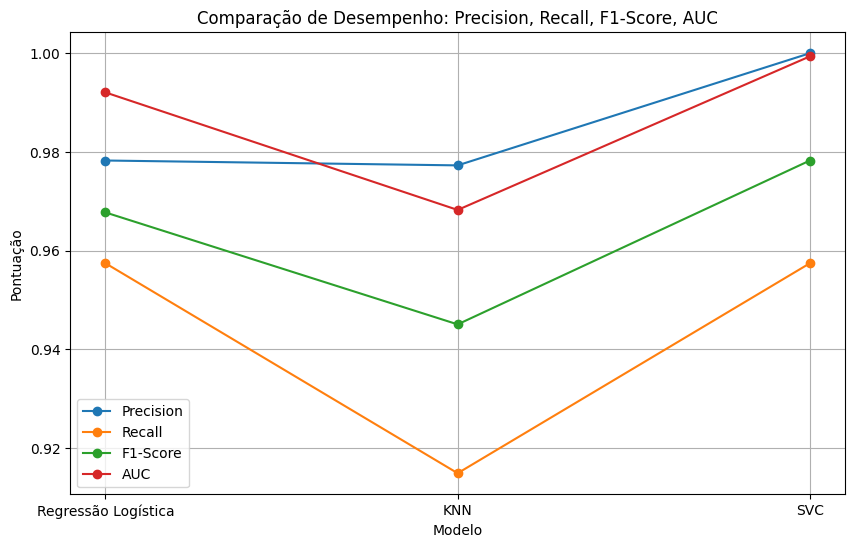

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

results = {}

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred, average="binary")
    recall = recall_score(y_test, y_test_pred, average="binary")
    f1 = f1_score(y_test, y_test_pred, average="binary")
    
    auc_score = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else "N/A"

    results[name] = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc_score
    }

# 1. Regressão Logística
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
evaluate_model("Regressão Logística", log_reg, X_train, y_train, X_test, y_test)

# 2. KNN
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model("KNN", knn, X_train, y_train, X_test, y_test)

# 3. SVC
svc = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], probability=True)  # Ajuste baseado no grid search
evaluate_model("SVC", svc, X_train, y_train, X_test, y_test)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df.index.name = "Model"
results_df.reset_index(inplace=True)

print(results_df)

# Plot Precision, Recall, F1-Score
plt.figure(figsize=(10, 6))
metrics = ["Precision", "Recall", "F1-Score", "AUC"]
for metric in metrics:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("Comparação de Desempenho: Precision, Recall, F1-Score, AUC")
plt.ylabel("Pontuação")
plt.xlabel("Modelo")
plt.legend()
plt.grid()
plt.show()
